In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
len(df)

303

In [4]:
ignore_zeros = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in ignore_zeros:
    df[col] = df[col].replace(0, np.NaN)
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.NaN, mean)
    
print(df)
    

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      1.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [5]:
x = df.iloc[:, 0:13]
y = df.iloc[:, 13]

print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      1.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,1.0,1,1,2
64,58,1,2,140,211,1,0,165,0,1.0,2,0,2
296,63,0,0,124,197,0,1,136,1,1.0,1,0,2
287,57,1,1,154,232,0,0,164,0,1.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,1.0,2,0,2


In [8]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [9]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

In [10]:
import math
math.sqrt(len(y_test))

7.810249675906654

In [11]:
model = KNeighborsClassifier(n_neighbors=9, p=2, metric='euclidean')

In [12]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8688524590163934

In [13]:
y_pred = model.predict(x_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22  5]
 [ 3 31]]


Text(33.0, 0.5, 'Prediction')

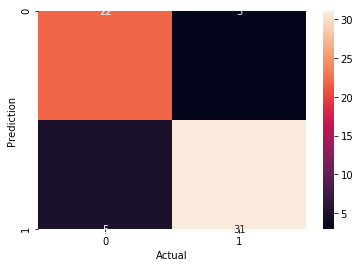

In [15]:
sns.heatmap(cm.T, annot=True)
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [17]:
knn_scores = []

for k in range(1,25):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    knn_scores.append(model.score(x_test, y_test))
    
knn_scores

[0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.8524590163934426,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.9016393442622951,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902]

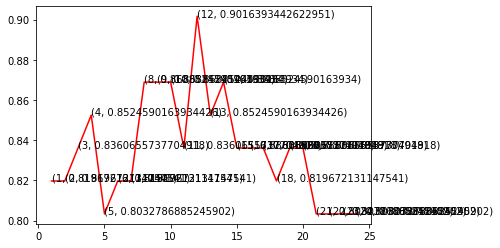

In [20]:
plt.plot([k for k in range(1, 25)], knn_scores, color = 'red')

for i in range(1, 25):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

In [22]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9016393442622951